In [17]:
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## dosen't divided data

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris_tree = DecisionTreeClassifier()
iris_tree.fit(iris.data[:, 2:], iris.target)

DecisionTreeClassifier()

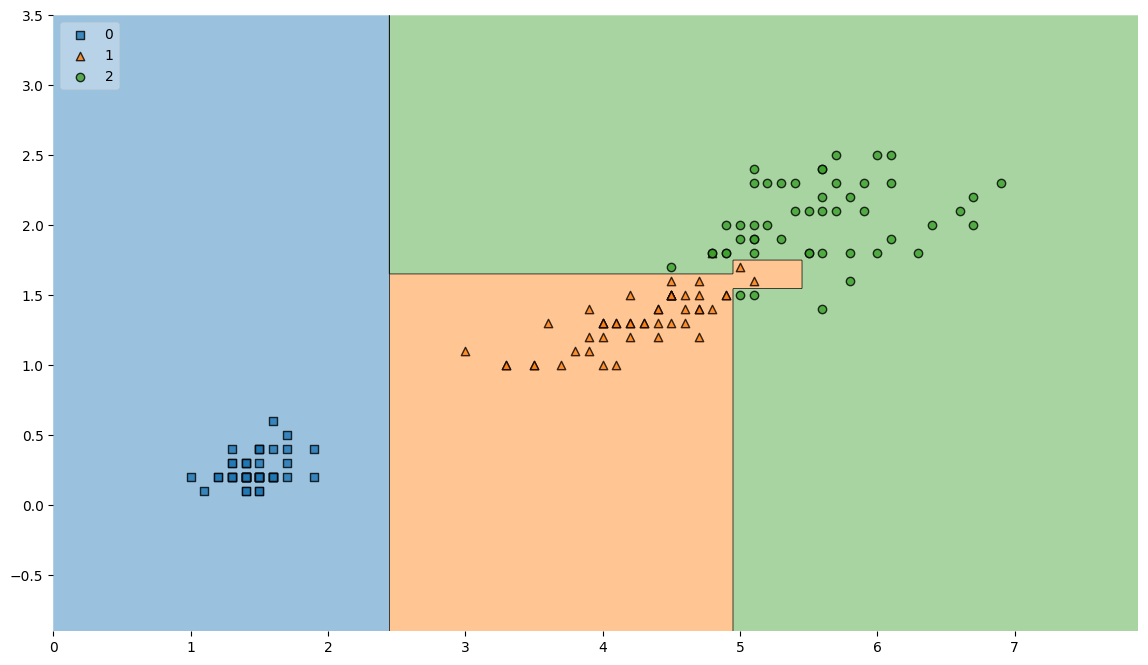

In [6]:
plt.figure(figsize=(14,8))
plot_decision_regions(X=iris.data[:, 2:], y=iris.target, clf=iris_tree, legend=2)
plt.show()

In [7]:
y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

0.9933333333333333

## divide data (Training/Validation/Testing)

In [8]:
iris = load_iris()

In [11]:
features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    random_state=13)

In [12]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 9,  8, 13]))

### divide data with same size

In [13]:
features = iris.data[:, 2:]
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

In [14]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

In [15]:
iris_tree=DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [16]:
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

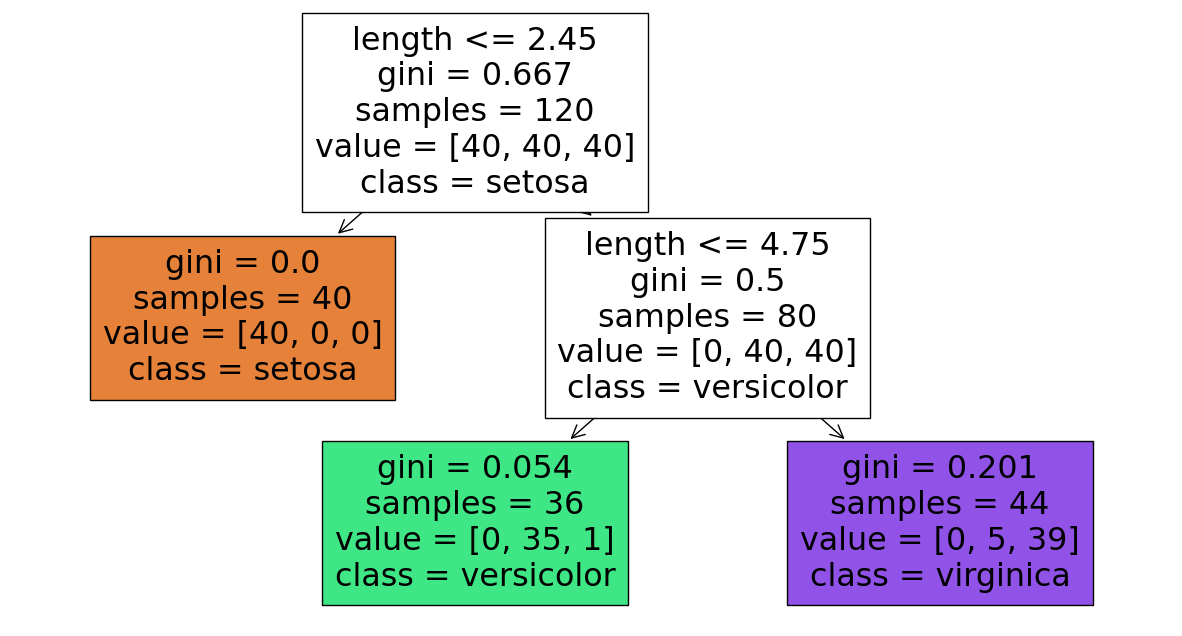

In [18]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(iris_tree,
                   feature_names=['length', 'width'],
                   class_names=list(iris.target_names),
                   filled=True)

### train data

In [24]:
y_pred_tr = iris_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.95

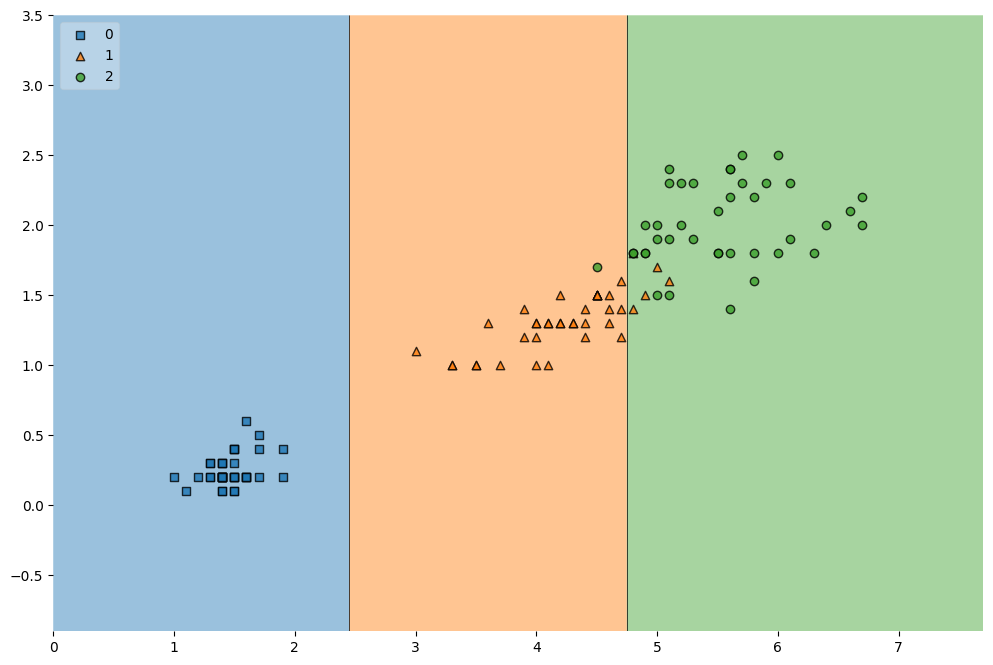

In [19]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show()

### test data

In [20]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667

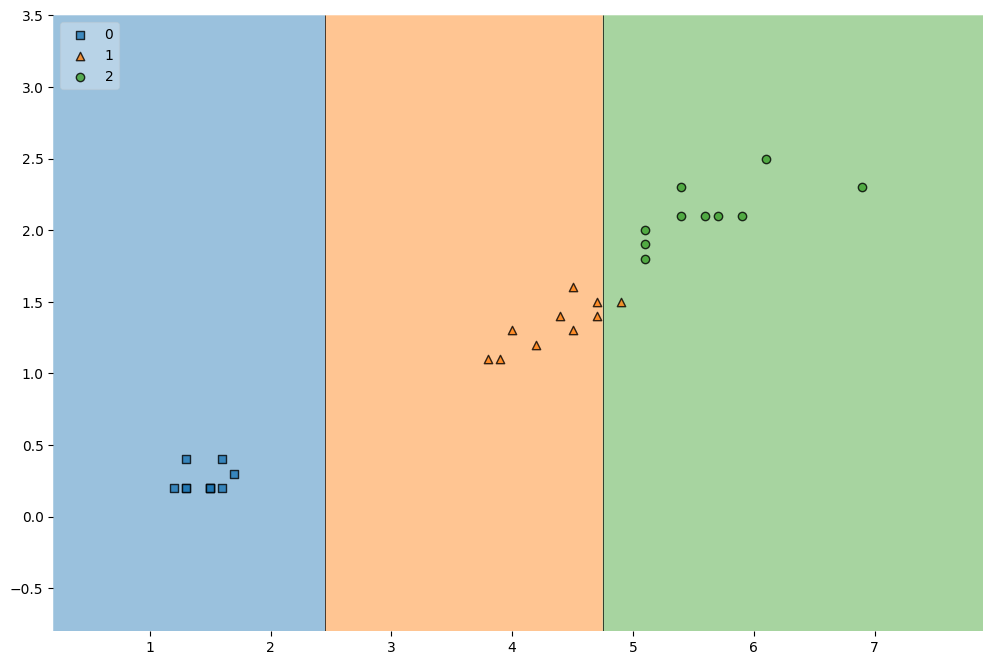

In [21]:
plt.figure(figsize=(12,8))
plot_decision_regions(X=X_test, y=y_test, clf=iris_tree, legend=2)
plt.show()

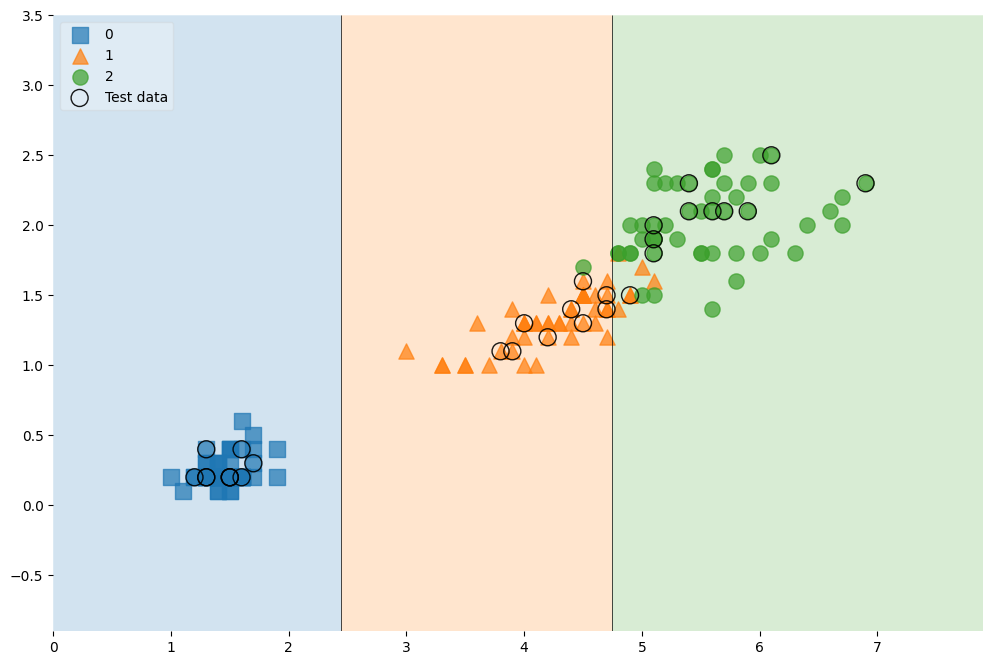

In [22]:
scatter_highlight_kwargs = {'s' : 150, 'label' : 'Test data', 'alpha' : 0.9}
scatter_kwargs = {'s' : 120, 'edgecolor' : None, 'alpha' : 0.7}

plt.figure(figsize=(12,8))
plot_decision_regions(X=features, y=labels,
                      X_highlight=X_test, clf=iris_tree, legend=2,
                      scatter_highlight_kwargs=scatter_highlight_kwargs,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs={'alpha' : 0.2})
plt.show()

### four feartures

In [29]:
iris = load_iris()
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.2,
                                                    stratify=labels,
                                                    random_state=13)

In [32]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

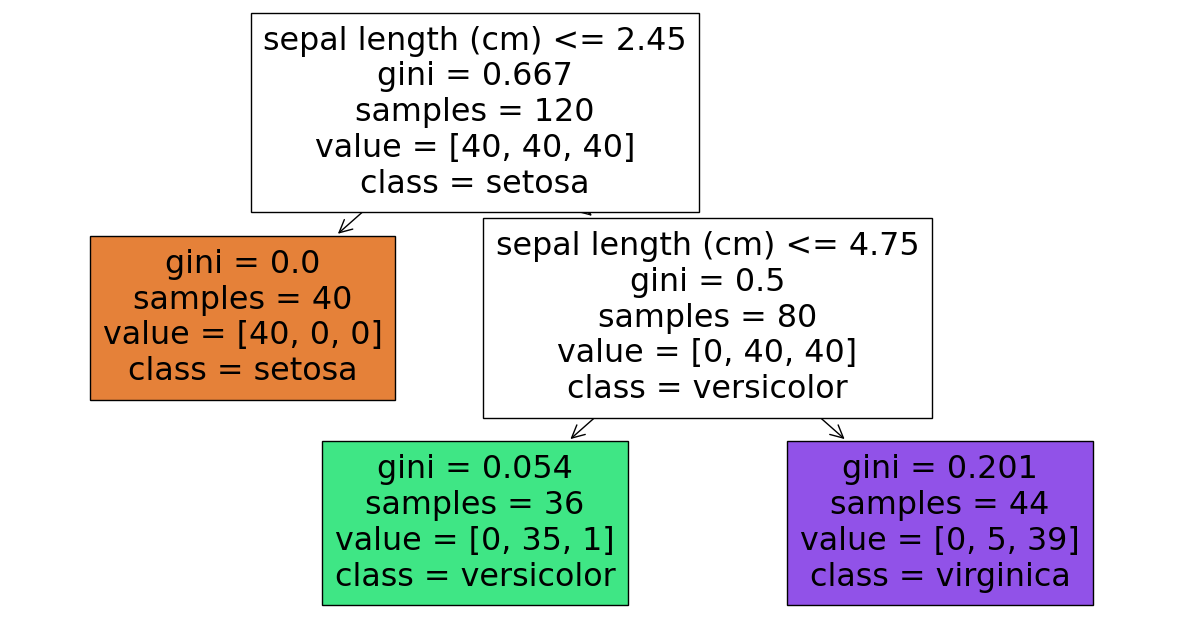

In [27]:
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(iris_tree,
                   feature_names=list(iris.feature_names),
                   class_names=list(iris.target_names),
                   filled=True)

In [30]:
iris_tree = DecisionTreeClassifier(random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [31]:
test_data = [[4.3, 2. , 1.2, 1.0]]
iris_tree.predict_proba(test_data)

array([[0., 1., 0.]])

In [33]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [34]:
test_data = [[4.3, 2., 1.2, 1.0]]
iris.target_names[iris_tree.predict(test_data)]

array(['versicolor'], dtype='<U10')

In [35]:
iris_tree.feature_importances_

array([0.        , 0.05      , 0.38920455, 0.56079545])

In [36]:
iris_clf_model = dict(zip(iris.feature_names, iris_tree.feature_importances_))
iris_clf_model

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.049999999999999996,
 'petal length (cm)': 0.3892045454545454,
 'petal width (cm)': 0.5607954545454547}

In [37]:
list1=['a', 'b', 'c']
list2=[1, 2, 3]

In [43]:
pairs = [pair for pair in zip(list1, list2)]
pairs

[('a', 1), ('b', 2), ('c', 3)]

In [44]:
dict(pairs)

{'a': 1, 'b': 2, 'c': 3}

In [45]:
dict(zip(list1, list2))

{'a': 1, 'b': 2, 'c': 3}

In [46]:
a, b = zip(*pairs)

print(list(a))
print(list(b))


['a', 'b', 'c']
[1, 2, 3]
